In [ ]:
# 泰坦尼克号乘客数据分析

说明：数据来源于kaggle网站，分析的目的在于探索每个特征和是否存活之间的关系。

## 数据初探
说明：数据集的整体状况，是否有缺失、异常值，数据的取值范围，特征的含义等

In [1]:
# 读入训练数据
import pandas as pd
import numpy as np
data = pd.read_csv("data/titan_train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


特征含义：
- PassengerId：乘客编号（无意义）
- Survived：是否存活（1-存活，0-未存活），目标特征
- Pclass：船舱等级（1、2、3等舱）
- SibSp：堂兄弟姐妹个数
- Parch：直系亲属个数
- Embarked：登船港口

In [2]:
# 看一看数据的基本信息
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


我们发现：
- 乘客总数（记录数）：891
- 特征总数：12
- 缺失：年龄、船舱编号、登船港口

In [2]:
# 看一看数据的基本统计值
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


我们可以看出：
- 平均年龄29.7岁，说明乘客青壮年居多
- 存活率38.4%
- 2、3等舱乘客比一等舱要多很多

## 简单的数据预处理
### 缺失值处理

In [3]:
# 对年龄缺失值的处理，采用平均值填充
import numpy as np 
aver_age = np.round(np.mean(data.Age),1)
data.Age[data.Age.isnull()] = aver_age
print("平均年龄：", data["Age"].mean())
data.info()

平均年龄： 29.69929292929302
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


处理后可以看出，平均年龄不变，年龄特征已经没有缺失值了。

In [4]:
# 对于船舱编号的处理，有船舱编号的设为Yes，无No
data.loc[data.Cabin.notnull(),"Cabin"] = "Yes"
data.loc[data.Cabin.isnull(),"Cabin"] = "No"
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,No,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,Yes,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,No,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,Yes,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,No,S


In [7]:
# 对于登船港口的处理，我们采用最频繁的值填充
data.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [8]:
# 我们用最多的“S”来填充缺失的登船港口
data.loc[data.Embarked.isnull(),"Embarked"] = "S"
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


经过处理之后，发现已经没有缺失值，简单的数据预处理告一段落。

## 数据初步分析
乘客有很多的特征（12个），哪些特征更有用，如何使用这些特征进行数据分析？

### 乘客各属性的分布
分析每个特征各个取值的数据分布

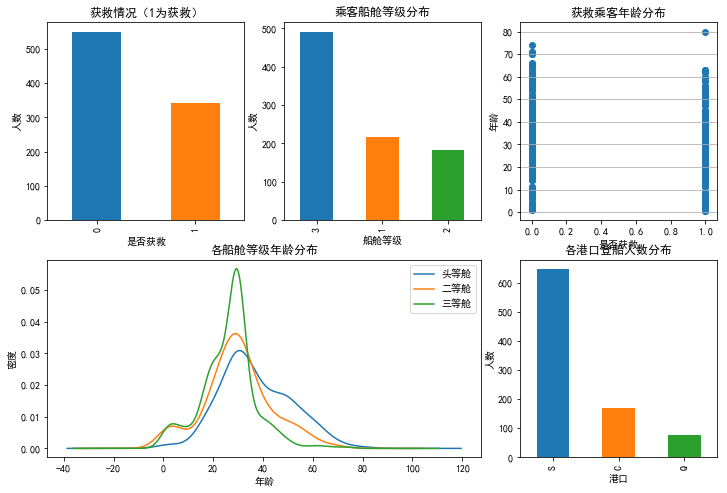

In [10]:
# 引入绘图库并设置相关参数（中文处理）
import matplotlib.pyplot as plt
plt.rcParams["font.sans-serif"] = "SimHei"
plt.rcParams["axes.unicode_minus"] = False

# 设置图形大小
fig = plt.figure(figsize=(12,8))
fig.set(alpha=0.2)

# 设置子图，绘制获救情况的条形图
plt.subplot2grid((2,3),(0,0))
data.Survived.value_counts().plot(kind="bar")
plt.title("获救情况（1为获救）")
plt.xlabel("是否获救")
plt.ylabel("人数")

# 绘制乘客船舱等级分布
plt.subplot2grid((2,3),(0,1))
data.Pclass.value_counts().plot(kind="bar")
plt.title("乘客船舱等级分布")
plt.xlabel("船舱等级")
plt.ylabel("人数")

# 绘制获救和年龄之间的关系的散点图
plt.subplot2grid((2,3),(0,2))
plt.scatter(data.Survived, data.Age)
plt.title("获救乘客年龄分布")
plt.xlabel("是否获救")
plt.ylabel("年龄")
plt.grid(b=True,which="major", axis="y")

# 绘制各船舱等级的年龄分布
plt.subplot2grid((2,3),(1,0),colspan=2)
data.Age[data.Pclass==1].plot(kind="kde")
data.Age[data.Pclass==2].plot(kind="kde")
data.Age[data.Pclass==3].plot(kind="kde")
plt.xlabel("年龄")
plt.ylabel("密度")
plt.title("各船舱等级年龄分布")
plt.legend(["头等舱","二等舱","三等舱"])

# 绘制各港口登船人数分布
plt.subplot2grid((2,3),(1,2))
data.Embarked.value_counts().plot(kind="bar")
plt.title("各港口登船人数分布")
plt.xlabel("港口")
plt.ylabel("人数")
plt.show()

从上面的分析可以看出：  
- 获救人数300多点，不到半数；
- 3等舱乘客非常多，超过半数；
- 遇难和获救乘客年龄分布非常广，没有特别的规律，但是60岁以上基本全部遇难；
- 2、3等舱主要是20-30岁之间的乘客，头等舱主要40岁以上；
- S港口登船人数最多（南安普顿）。

## 属性和获救结果的关系
### 一些想法
- 年龄和性别（小孩和女士优先？）
- 舱位等级（财富和生命？）
- 登船港口、船舱编号（有无）、直系亲属和兄弟姐妹？

### 船舱等级

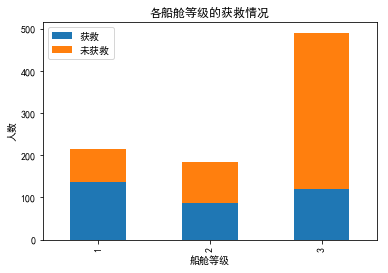

In [11]:
# 船舱等级和获救之间的关系分析
# 绘图库引入和设置（略）
# 计算各等级获救和遇难的人数
s_0 = data.Pclass[data.Survived==0].value_counts()
s_1 = data.Pclass[data.Survived==1].value_counts()
# 创建一个数据框
df = pd.DataFrame({"获救":s_1, "未获救":s_0})
# 绘制层叠条形图（使用pandas绘图）
df.plot(kind="bar", stacked=True)
plt.title("各船舱等级的获救情况")
plt.xlabel("船舱等级")
plt.ylabel("人数")
plt.show()

可以看出：头等舱获救比例非常高，3等舱获救比例非常低，财富真能买到生命？

### 性别

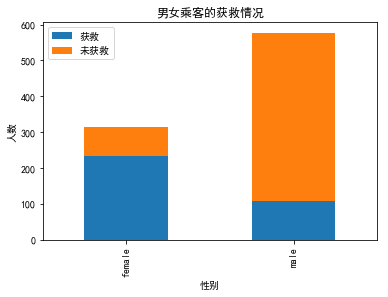

In [12]:
# 计算男性和女性获救和遇难人数
s_0 = data.Sex[data.Survived==0].value_counts()
s_1 = data.Sex[data.Survived==1].value_counts()
df = pd.DataFrame({"获救":s_1, "未获救":s_0})
# 绘制层叠条形图（使用pandas绘图）
df.plot(kind="bar", stacked=True)
plt.title("男女乘客的获救情况")
plt.xlabel("性别")
plt.ylabel("人数")
plt.show()

女性获救比例远远高于男性，说明女士优先的绅士文化根深蒂固。

### 性别和船舱等级

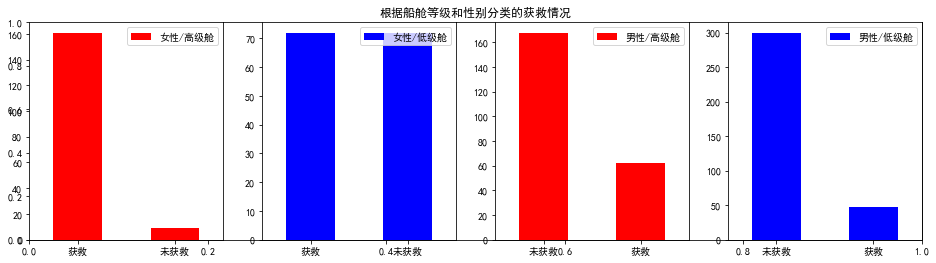

In [13]:
# 船舱等级和性别对于获救的综合分析
fig = plt.figure(figsize=(16,4))
fig.set(alpha=0.6)
plt.title("根据船舱等级和性别分类的获救情况")
# 女性1、2等舱
ax1 = fig.add_subplot(141)
data.Survived[data.Sex=="female"][data.Pclass!=3].value_counts().plot(kind="bar",color="red")
ax1.set_xticklabels(["获救","未获救"], rotation=0)
ax1.legend(["女性/高级舱"], loc="best")
# 女性3等舱
ax2 = fig.add_subplot(142)
data.Survived[data.Sex=="female"][data.Pclass==3].value_counts().plot(kind="bar",color="blue")
ax2.set_xticklabels(["获救","未获救"], rotation=0)
ax2.legend(["女性/低级舱"], loc="best")
# 男性1、2等舱
ax3 = fig.add_subplot(143)
data.Survived[data.Sex=="male"][data.Pclass!=3].value_counts().plot(kind="bar",color="red")
ax3.set_xticklabels(["未获救","获救"], rotation=0)
ax3.legend(["男性/高级舱"], loc="best")
# 男性3等舱
ax4 = fig.add_subplot(144)
data.Survived[data.Sex=="male"][data.Pclass==3].value_counts().plot(kind="bar",color="blue")
ax4.set_xticklabels(["未获救","获救"], rotation=0)
ax4.legend(["男性/低级舱"], loc="best")

plt.show()

几点结论：
- 高级舱女性几乎全部获救
- 高级舱男性没有女性的运气，但高级舱比低级舱获救比例还是高一些

### 登船港口

<Figure size 432x288 with 0 Axes>

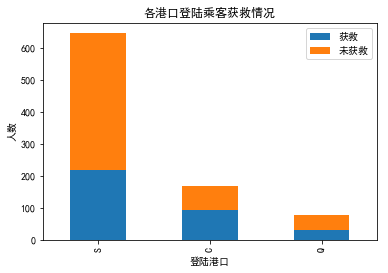

In [24]:
# 登船港口和获救的关系
fig=plt.figure()
fig.set(alpha=0.2)
s_0 = data.Embarked[data.Survived==0].value_counts()
s_1 = data.Embarked[data.Survived==1].value_counts()
df = pd.DataFrame({"获救":s_1, "未获救":s_0})
df.plot(kind="bar", stacked=True)
plt.title("各港口登陆乘客获救情况")
plt.xlabel("登陆港口")
plt.ylabel("人数")
plt.show()

登陆港口似乎和获救与否没有直接关系，但C港（法国瑟堡）获救率稍高，法国人更会逃生？

### 父母孩子、堂兄弟姐妹

In [25]:
# 堂兄弟姐妹
g = data.groupby(by=["SibSp","Survived"])
df = pd.DataFrame(g.count()["PassengerId"])
df

PassengerId
SibSp Survived             
0     0                 398
      1                 210
1     0                  97
      1                 112
2     0                  15
      1                  13
3     0                  12
      1                   4
4     0                  15
      1                   3
5     0                   5
8     0                   7

In [26]:
# 父母孩子
g = data.groupby(by=["Parch","Survived"])
df = pd.DataFrame(g.count()["PassengerId"])
df

PassengerId
Parch Survived             
0     0                 445
      1                 233
1     0                  53
      1                  65
2     0                  40
      1                  40
3     0                   2
      1                   3
4     0                   4
5     0                   4
      1                   1
6     0                   1

亲属的个数和获救没有明显的规律。似乎兄弟姐妹超过4个或父母孩子超过3个的几乎全部遇难。以后旅游不要全家倾巢出动？

### 船舱编号（有无）

<Figure size 432x288 with 0 Axes>

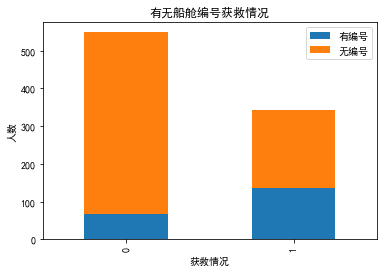

In [28]:
# 船舱编号和获救的关系
fig=plt.figure()
fig.set(alpha=0.2)
s_c = data.Survived[data.Cabin=="Yes"].value_counts()
s_nc = data.Survived[data.Cabin=="No"].value_counts()
df = pd.DataFrame({"有编号":s_c, "无编号":s_nc})
df.plot(kind="bar", stacked=True)
plt.title("有无船舱编号获救情况")
plt.xlabel("获救情况")
plt.ylabel("人数")
plt.show()

似乎有编号的获救比例明显要高一些。信息健全的人应该比盲流社会地位要高一些。